# 8.4 Eurovision contest graph

## Preparation

In [1]:
# We'll need some modules
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# and some data
esc = pd.read_csv("Data/8.4-ESC-2015-grand_final-points.csv")
esc.head()

,From country,To country,Points
0,Albania,Armenia,\n
1,Albania,Australia,3
2,Albania,Austria,\n
3,Albania,Azerbaijan,\n
4,Albania,Belgium,1


In [9]:
# Points null values seem to be \n, let's make that 0
for i in range(len(esc.Points)):
    if esc.Points[i] == "\n":
        esc.Points[i] = 0
        
esc.head()

,From country,To country,Points
0,Albania,Armenia,0
1,Albania,Australia,3
2,Albania,Austria,0
3,Albania,Azerbaijan,0
4,Albania,Belgium,1


## Creating the graph

In [23]:
# We'll need a directed graph this time, to calculate the points
G = nx.DiGraph()

In [24]:
G.add_nodes_from(esc["From country"])

In [25]:
for i in range(len(esc)):
    G.add_edge(esc["From country"][i], esc["To country"][i], weight=esc["Points"][i])


In [29]:
print("Number of nodes/countries: {}".format(G.number_of_nodes()))
print("Number of countries: {}".format(len(set(esc["From country"]))))

Number of nodes/countries: 40
Number of countries: 40


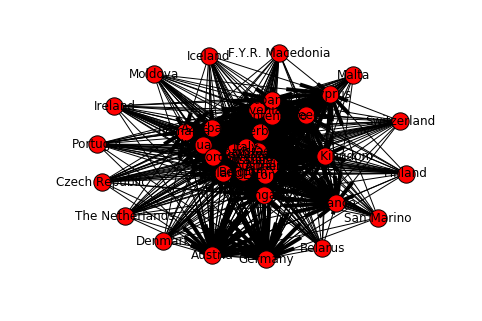

In [31]:
nx.draw(G, with_labels=True)

## Let's try to get some answers to the quiz

In [ ]:
# A list with country names might come in handy
countries = set(esc["From country"])

In [45]:
# How many points did Belgium get?

# The way to get a score is to get the weight of the edge to Belgium, like so
print("Score from Ireland to Belgium: {}".format(G["Ireland"]["Belgium"]["weight"]))

# So if we check this for all countries and sum them, we have Belgium's score
score = 0
for country in countries:
    if country != "Belgium":
        score += int(G[country]["Belgium"]["weight"])
    
print("Total score for Belgium: {}".format(score))

Score from Ireland to Belgium: 2
Total score for Belgium: 217


In [47]:
# How many countries gave Norway at least 1 point?
gave_norway_at_least_one_point = 0
for country in countries:
    if country != "Norway":
        if int(G[country]["Norway"]["weight"]) > 0:
            gave_norway_at_least_one_point += 1
        
print(gave_norway_at_least_one_point)

22


In [54]:
# how many countries gave each other 12 points?
twelve_twelve = 0
for country1 in countries:
    for country2 in countries:
        try:
            score1 = int(G[country1][country2]["weight"])
        except KeyError:
            continue
        try:
            score2 = int(G[country2][country1]["weight"])
        except KeyError:
            continue
        if score1 == 12 and score1 == score2:
            twelve_twelve += 1
            
twelve_twelve

4